In [ ]:
# Since MNIST is the most popular dataset, So we can download it
# with the help of Scikit-learn
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version = 1)
# Those datasets which are downloaded with the aid of Sklearn have Dictionary 
# Structure.
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X,Y = mnist["data"],mnist["target"]
X.shape
# (70000, 784) is the shape of the data means it has 70,000 rows and 784 columns
Y.shape
# of course its our label so it has 70,000 rows with just single column

(70000,)

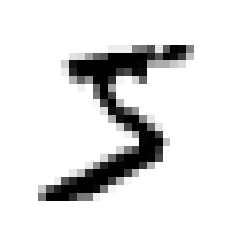

5

In [ ]:
# Lets display some images
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = mpl.cm.binary, interpolation= "nearest")
plt.axis("off")
plt.show()
# Instead of string label should be in int format
Y = Y.astype(np.uint8)
Y[0]

In [ ]:
# Now its time to acutally split the data into training and testing set.
# The mnist dataset is already splitted into training and testing instances.
# First 60000 images are training set and rest of the instances belongs to test set
X_train, Y_train, X_test, Y_test = X[:60000],Y[:60000],X[60000:],Y[60000:]
# The training set is already shuffled for us and its a good as all cross-validation
# folds will be similar
# Now its time to train a binary classifier
Y_train_5 = (Y_train == 5)
Y_test_5 = (Y_test == 5)
# We will use Stochastic Gradient descent 
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train,Y_train_5)




SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Now its the time to check the model.
sgd_classifier.predict([some_digit])
# Evaluation of model's performance
# The first method to measure the performance of a classifer is through cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier,X_train,Y_train_5,cv=3,scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# Now we are going to build a dummy classifier
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1),dtype=int)
nevr_5_clsf = Never5Classifier()
cross_val_score(nevr_5_clsf, X_train, Y_train_5,cv=3, scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

In [ ]:
# CONFUSION MATRIX
# There are two reuirements for confuion matrix Predictions and actual targets
# Computing predictions through sklearn method
from sklearn.model_selection import cross_val_predict
Y_train_predict = cross_val_predict(sgd_classifier, X_train, Y_train_5,cv=3)
Y_train_predict[:5]

array([ True, False, False, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Y_train_5,Y_train_predict)
# Now we will be looking at more consise metrices which can be calculated
# using confusion matrix
# PRECISION VS RECALL
# Recall has some space for errors but precision do not
# PRECISION: Think about the predictions as your base
# RECALL: Think about the truth as your base
# https://www.youtube.com/watch?v=2osIZ-dSPGE for reference
print("CLASSIFICATION REPORT")
# Now on the basis of only accuracy, which was >90% you cannot predict the model
# performing well.
# Discovring another metric called F1 Score, which is the converging of precsion
# and recall
# F1 score is the harmonic mean of precision and recall. HM is the reciporcal of 
# Arithmetic mean of the recipocal of values (CENTRAl TENDENCY TOPIC)
# Another method to get all these three is through classification report
print(classification_report(Y_train_5,Y_train_predict))


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [ ]:
# PRECISION/RECALL Tradeoff
# Unfortunately we cannot increase both these as they behave in inverse proportionality
# we cannot set the threshold but can veiw the discision scores
y_scores = sgd_classifier.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict
# If we increase the threshold we will increase the precision but decrease the 
# recall
threshold = 8000
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict
# Now the problem is how do we know which threshold should we use?
y_scores = cross_val_predict(sgd_classifier, X_train,Y_train_5, cv = 3, method="decision_function")
# on the basis of these scores instances are classified as 5 or not 5
y_scores


array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

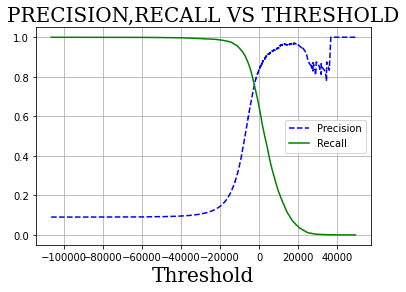

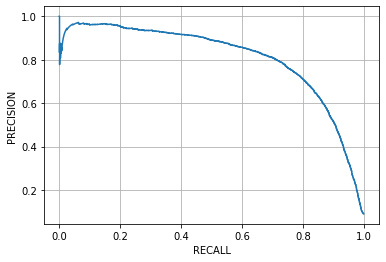

In [ ]:
# we can calculate precision and recall for different thresholds 
# https://www.youtube.com/watch?v=UO98lJQ3QGI for plot reference
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train_5,y_scores)
# plotting precision recall as function of decision
def plot_precision_recall_vs_threshold(precision,recall,threshold):
  plt.plot(thresholds,precision[:-1],"b--",label = "Precision")
  plt.plot(thresholds,recall[:-1],"g-",label = "Recall")
  plt.legend()
  plt.title("PRECISION,RECALL VS THRESHOLD",fontdict={'family':'serif','color':'black','size':20})
  plt.xlabel("Threshold",fontdict={'family':'serif','color':'black','size':20})
  plt.grid()
  plt.show()
def plot_precision_vs_recall(precision,recall):
  plt.plot(recall[:-1],precision[:-1],)
  plt.xlabel("RECALL")
  plt.ylabel("PRECISION")
  plt.grid()
  plt.show()

plot_precision_recall_vs_threshold(precisions,recalls,threshold=thresholds)
print("\n")
plot_precision_vs_recall(precisions,recalls)


In [ ]:
# We got our index from the array based on specific condition
from sklearn.metrics import precision_score, recall_score
# https://www.javatpoint.com/numpy-argmax for reference
thresh_90_precs = thresholds[np.argmax(precisions>=0.90)]
y_train_predict_90 = (y_scores>= thresh_90_precs)
print("PRECISION:", precision_score(Y_train_5,y_train_predict_90))
print("RECALL:", recall_score(Y_train_5,y_train_predict_90))
# So we got 90% precise classifier


PRECISION: 0.9000345901072293
RECALL: 0.4799852425751706


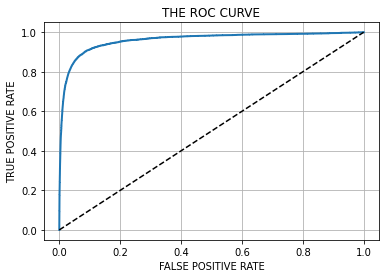

In [ ]:
# THE ROC CURVE
# Plotting TPR(RECALL) VS FPR, We can get FPR using TNR-1 which is also called specificity
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(Y_train_5,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 plt.title("THE ROC CURVE")
 plt.grid()
 plt.xlabel("FALSE POSITIVE RATE")
 plt.ylabel("TRUE POSITIVE RATE")
plot_roc_curve(fpr,tpr)


In [ ]:
# Another way to compare classifiers is through AUC-ROC
# An ideal classifier has an area equal to 1
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5,y_scores)
# We are going to train another classifier
from sklearn.ensemble import RandomForestClassifier
forest_clfr = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clfr, X_train,Y_train_5, cv=3, method="predict_proba")


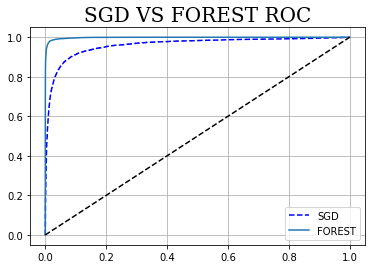

PRECISION: 0.9905083315756169
RECALL: 0.8662608374838591


In [ ]:
y_probas_forest[:5]
y_forest_predict = cross_val_predict(forest_clfr, X_train,Y_train_5, cv=3, method="predict")
# To plot the roc curve we need scores instead of probabilites
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest, thresholds_forest = roc_curve(Y_train_5,y_scores_forest)
# Plotting both roc curve sgd and random forest
plt.plot(fpr,tpr,"b--",label = "SGD")
plt.plot(fpr_forest,tpr_forest,label = "FOREST")
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.legend()
plt.title("SGD VS FOREST ROC",fontdict={'family':'serif','color':'black','size':20})
plt.grid()
plt.show()
roc_auc_score(Y_train_5,y_scores_forest)
print("PRECISION:", precision_score(Y_train_5,y_forest_predict))
print("RECALL:", recall_score(Y_train_5,y_forest_predict))

In [ ]:
# MULTI CLASS CLASSIFICATION
# OvA VS OvO, if we try to train a binary classifer to classify in more than one
# class, then sklearn automatically uses OvA technique
sgd_classifier.fit(X_train,Y_train)
sgd_classifier.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
some_digit_scores = sgd_classifier.decision_function([some_digit])
# np.argmax(some_digit_scores) for the index of maximum value in the array
sgd_classifier.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# We can also force sklearn to Use OvO or OvA Strategies
from sklearn.multiclass import OneVsOneClassifier
ovo_clsf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clsf.fit(X_train,Y_train)
ovo_clsf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
# Estimator and Models are the Same things in AI
len(ovo_clsf.estimators_)
# In Case of Random Forest Classifer both OvO and OvA are not utilized because
# it automatically classifies each instance into multiple classes
forest_clfr.fit(X_train,Y_train)
forest_clfr.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
forest_clfr.predict_proba([some_digit])
# Now We are going to evaluate the Classifiers
cross_val_score(sgd_classifier, X_train, Y_train, cv = 3, scoring= "accuracy")


array([0.87365, 0.85835, 0.8689 ])

In [ ]:
# One way to increase the accuracy is through feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_classifier, X_train_scaled, Y_train, cv = 3, scoring= "accuracy")


array([0.8983, 0.891 , 0.9018])

In [ ]:
# ERROR ANALYSIS
# One of the ways to improve Model's performance
y_train_pred = cross_val_predict(sgd_classifier, X_train_scaled, Y_train, cv=3)


CONFUSION MATRIX
[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


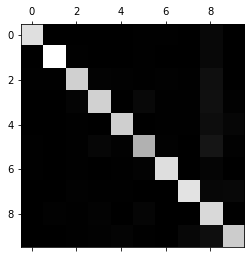

In [ ]:
cm = confusion_matrix(Y_train,y_train_pred)
print("CONFUSION MATRIX")
print(cm)
# Let see the confusion matrix in image format
plt.matshow(cm, cmap = plt.cm.gray)
plt.show()

<Figure size 3600x720 with 0 Axes>

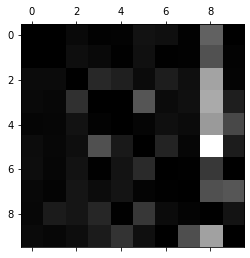

In [ ]:
# Plotting Errors
rows_sum = cm.sum(axis=1, keepdims=True)
norm_cm  = cm/rows_sum
np.fill_diagonal(norm_cm,0)
plt.matshow(norm_cm,cmap= plt.cm.gray)
plt.show()


In [ ]:
# MULTILABEL CLASSIFICATION (BINARY OUTPUT)
from sklearn.neighbors import KNeighborsClassifier
# Its a mostly used classifier for multilabel classification
y_train_large = (Y_train>=7)
y_train_odd = (Y_train % 2 == 1)
# np.c_ is for concatinating two array elemnts into single one
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clsf = KNeighborsClassifier()
knn_clsf.fit(X_train, y_multilabel)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.model_selection import cross_val_predict
# average{‘micro’, ‘macro’, ‘samples’,’weighted’, ‘binary’} or None, default=’binary’
# Checking Model
knn_clsf.predict([some_digit])
# Evaluating Multilabel Classifier
# Calculating F1 Score for both labels
y_train_knn_pred = cross_val_predict(knn_clsf,X_train,y_multilabel, cv= 3)

In [ ]:
# FI Score
from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.976410265560605

In [ ]:
# MULTIOUTPUT CLASSIFICATION
# NOISE REMOVER SYSTEM
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
# Images without noise are the labels and with noise are the inputs
Y_train_mod = X_train
Y_test_mod = X_test


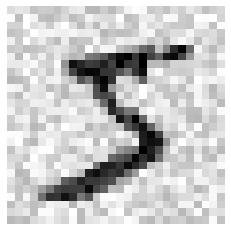

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Lets PrintOut the Noisy Image
from sklearn.neighbors import KNeighborsClassifier
some_digit_mod = X_train_mod[0]
some_digit_image_mod = some_digit_mod.reshape(28,28)
plt.imshow(some_digit_image_mod,cmap = mpl.cm.binary, interpolation= "nearest")
plt.axis("off")
plt.show()
# Now lets train the model
knn_clsf = KNeighborsClassifier()
knn_clsf.fit(X_train_mod,Y_train_mod)

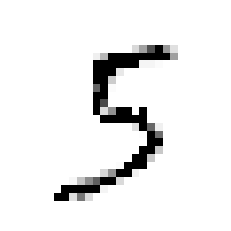

In [ ]:
# Lets see if the model can clean this image
clean_digit = knn_clsf.predict([X_train_mod[0]])
clean_digit_image_mod = clean_digit.reshape(28,28)
plt.imshow(clean_digit_image_mod,cmap = mpl.cm.binary, interpolation= "nearest")
plt.axis("off")
plt.show()
# That All For The Classification.